In [1]:
# Importing section

import gym
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

from matplotlib.animation import FuncAnimation
from IPython.display import Video
from collections import deque

In [2]:
# Initialiting the environment

env = gym.make('Breakout-ram-v0')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)
env.unwrapped.get_action_meanings()

State shape:  (128,)
Number of actions:  4


['NOOP', 'FIRE', 'RIGHT', 'LEFT']

In [7]:
# Instantiating the agent

import ddqn_agent

agent = ddqn_agent.Agent(env, state_space_dim=128, action_space_dim=4, seed=0)

In [8]:
# DQN Algorithm

def ddqn (env, Agent, n_episodes = 20000, n_steps_episodes = 10000, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995):
    
    scores = [] # List of scores for plotting
    scores_deq = deque(maxlen = 100) # Deque useful to compute
    eps = eps_start
    
    for episode in range(1, n_episodes+1):
        
        state = env.reset()
        score = 0
        
        for step in range(1, n_steps_episodes + 1):
            
            action = Agent.act(state, eps)
            next_state, reward, is_done, info = env.step(action)
            Agent.Step(state, action, reward, next_state, is_done)
            state = next_state
            score += reward
            
            if is_done:
                break
                
        scores_deq.append(score)
        scores.append(score)  
        eps = max(eps_end, eps*eps_decay)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_deq)), end="")
        
        if episode % 500 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_deq)))
            sequenza = Agent.play()
            patch = plt.imshow(sequenza[0], cmap=None)  
            animation = FuncAnimation(plt.gcf(), lambda x:patch.set_data(sequenza[x]), frames = len(sequenza), interval = 20)
            animation.save('video {}.mp4'.format(episode))
                                
        if np.mean(scores_deq)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(scores_deq)))
            torch.save(Agent.Q_network.state_dict(), 'checkpoint.pth')
            sequenza = Agent.play()
            patch = plt.imshow(sequenza[0], cmap=None)  
            animation = FuncAnimation(plt.gcf(), lambda x:patch.set_data(sequenza[x]), frames = len(sequenza), interval = 20)
            animation.save('video {}.mp4'.format(episode))
            
            break
    
    return scores          

Episode 500	Average Score: 2.10
Episode 1000	Average Score: 1.57
Episode 1500	Average Score: 2.50
Episode 2000	Average Score: 2.29
Episode 2500	Average Score: 2.47
Episode 3000	Average Score: 2.28
Episode 3500	Average Score: 2.67
Episode 4000	Average Score: 2.19
Episode 4500	Average Score: 2.74
Episode 5000	Average Score: 2.28
Episode 5500	Average Score: 2.36
Episode 5656	Average Score: 1.97

KeyboardInterrupt: 

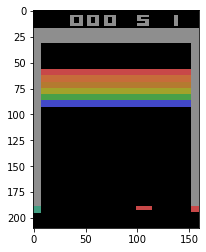

In [9]:
scores = ddqn(env, agent)

In [6]:
scores

NameError: name 'scores' is not defined